### Alvaro Plata (201820098), Brenda Barahona (201812721) , Sofía Álvarez (201729031)

<h1 align='center'>Laboratorio 2: Inteligencia de Negocios</h1>

BancAlpes es una entidad bancaria que está realizando una campaña de fidelización para aumentar la retención de clientes. En concreto, con su estrategía busca fidelizar especialmente a las personas que poseen tarjetas de crédito.
Esta campaña busca ofrecer los mejores productos, servicios y recomendaciones a sus clientes de acuerdo con sus características.
Por esta razón, ha recurrido a ustedes como consultores para que le entreguen al equipo de marketing información que pueda ayudarlos a orientar mejor sus campañas.
En particular, el equipo de marketing espera que le provean grupos a los cuales pueden dirigir sus campañas y las caracteristicas de los clientes en dichos grupos.
BancAlpes considera que esta nueva estrategia de marketing le permitirá aumentar el consumo de productos y servicios y por supuesto, aumentar la retención de clientes.

## 0. Librerias.

In [1]:
# Importamos todas las librerias necesarias para el laboratorio.
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from joblib import dump, load
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from pandas_profiling import ProfileReport
from sklearn.pipeline import Pipeline, FeatureUnion
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import recall_score, make_scorer
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

### 1. Análisis exploratorio y perfilamiento de los datos.

En esta etapa es sabremos cuántos datos tenemos (filas y columnas), el tipo de datos de las columnas, cual es la integridad de los datos, cuál es su distribución (discreta o continua). Ademas, para el caso de las columnas numéricas, usaremos estadística descriptiva sobre los datos, y señalaremos sus principales estadísticos: media, varianza, desviación estándar, etc.  En caso de datos categóricos conoceremos las categorías, los números de registro por categoría, en especial para las categorías con mayor representación en los datos.

Lectura de los datos

In [2]:
datos = pd.read_csv('202210_Laboratorio2_data_202210_Lab2_BancAlpes_CC_data.csv', delimiter=',')
datos

CUST_ID GENDER      BALANCE  PURCHASES  BALANCE_FREQUENCY CASH_ADVANCE  \
0     C12529      F   107.944741     118.16           0.875000   472.818286   
1     C14138    NaN   241.032979       0.00           1.000000   642.862505   
2     C15409    NaN   894.357857    1164.00           1.000000          0.0   
3     C18141      F  -188.132508     515.88           1.000000          0.0   
4     C15879    NaN  3881.679582      15.92           1.000000  2183.782456   
...      ...    ...          ...        ...                ...          ...   
5525  C10075    NaN   656.013010       0.00        1000.000000  1474.349901   
5526  C17321    NaN    15.232505     384.00           0.272727          0.0   
5527  C12909    NaN  1023.124791    1537.93           1.000000    247.04197   
5528  C15615      F   957.010021     604.80           1.000000   901.754709   
5529  C12391    NaN  2664.700424     715.51           1.000000   494.573662   

      CASH_ADVANCE_TRX  PURCHASES_FREQUENCY PURCHASES_TRX  \
0                  1.0             0.125000             2   
1                  1.0             0.000000             0   
2                  0.0             1.000000            12   
3                  NaN             0.833333            14   
4                  9.0             0.083333             1   
...                ...                  ...           ...   
5525               3.0             0.000000             0   
5526               0.0             1.000000          12?ñ   
5527               1.0             0.750000            25   
5528               3.0             1.000000            12   
5529               1.0           750.000000            11   

      ONEOFF_PURCHASES_FREQUENCY  CASH_ADVANCE_FREQUENCY  CREDIT_LIMIT  \
0                       0.125000                0.125000        2500.0   
1                            NaN                0.083333        1500.0   
2                            NaN                0.000000        2000.0   
3                            NaN                0.000000        2700.0   
4                            NaN                0.333333        5500.0   
...                          ...                     ...           ...   
5525                    0.000000                0.125000        7000.0   
5526                         NaN                0.000000        1500.0   
5527                    0.583333                0.083333        9000.0   
5528                         NaN                0.083333        1000.0   
5529                    0.083333                0.083333        3500.0   

         PAYMENTS MINIMUM_PAYMENTS TENURE  
0      192.781455        56.999671      8  
1      915.454305       195.162256     12  
2      907.603723       270.413449    -12  
3      601.729266       194.534934     12  
4     1032.183632      1129.747227     12  
...           ...              ...    ...  
5525   910.457985       140.983193      8  
5526   568.982664        54.449416     12  
5527  1070.149971       235.241959    -12  
5528   811.457190       926.087148     12  
5529   918.003032       792.902894     12  

[5530 rows x 15 columns]

In [3]:
print("Número de filas o datos: {}".format(len(datos)))
print("Número de columnas o variables: {}".format(len(datos.columns)))

Número de filas o datos: 5530
Número de columnas o variables: 15


Para conocer el tipo de datos de las columnas, cual es la integridad de los datos, cuál es su distribución (discreta o continua), procedemos a hacer el reporte de <code>pandas_profiling:</code>

In [4]:
profiling = ProfileReport(datos)
profiling.to_file(output_file="pandas_profiling.html")
profiling

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Análisis del reporte: 
Puntualmente pudimos encontrar los siguientes datos: 
* No hay celdas duplicadas. 
* Tenemos un porcentaje de celdas vacías o NA de 7.2%, lo cual representan 5933 celdas.
* Las variables que tienen valores vacios son: 
    
    1. OneOffPurchases_frecuency con un 49.5% con 2740 celdas vacías
    2. Gender con un 49.1% con 2714 celdas vacías
    3. Cash_advance_frecuency con un 3% con 166 celdas vacías
    4. Tenure con un 2.9% con 163 celdas vacías
    5. Cash_Advance_Trx con un 2.7% con 150 celdas vacías
    
    
* Se tienen 9 variables numéricas y 6 categóricas. Esto NO concuerda con el diccionario dado por BancAlpes. Encontramos queel tipo de dato identificado por pandas profiling es incorrecto para las siguientes variables, según lo indicado por el documento del diccionario, pues estas variable deben ser numéricas y fueron clasificadas como categóricas: 

    1. CashAdvance
    2. PurchasesTrx
    3. Minimum_payments
    4. Tenure
    
    
* Evidenciamos que de las variables numéricas, aquellas que tienen una distribución continua son :
    1. Balance
    2. Purchases
    3. OneOffPurchasesFrecuency
    4. Cash_advanceFrecuency
    5. Credit_limit 
    6. Payments
    
    
* Ademas de las variables antes mencionadas, encontramos que hay otras que tambien siguen una distrubición continua y que, debido a los outliers, no se evidenciaba una clara distribucion de los datos, ya que los rangos con los que pandas contruyó el histograma eran muy grandes.

* Descubrimos que las siguientes variables tienen datos atipicos. 
    1. Balance: datos fuera de rango. 
    2. Balance_frecuency: datos fuera de rango.
    3. Cash_advance: datos como ["??", "00.?ñ" , ...]
    4. Cash_advance_trx: datos fuera de rango. 
    5. Purchases_Frecuency: datos fuera de rango
    6. Cash_advance_frecuency: datos fuera de rango
    7. Credit_limit: datos fuera de rango
    8. Minimum_payments: datos como ["??", ...]
    
    

    
 

Para las columnas numéricas usaremos estadística descriptiva sobre los datos.

In [5]:
datos.describe()

BALANCE    PURCHASES  BALANCE_FREQUENCY  CASH_ADVANCE_TRX  \
count  5530.000000  5530.000000        5530.000000       5380.000000   
mean   1041.700463   534.577103          26.482552         49.115428   
std    1353.093044   773.488745         152.899316        573.817771   
min   -4587.892398     0.000000           0.000000          0.000000   
25%      74.060304     0.000000           0.833333          0.000000   
50%     632.743634   269.130000           1.000000          0.000000   
75%    1545.808455   723.700000           1.000000          3.000000   
max    7390.198560  9661.370000        1000.000000      18000.000000   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          5530.000000                 2790.000000   
mean             12.206006                    0.148298   
std              93.757671                    0.241687   
min               0.000000                    0.000000   
25%               0.000000                    0.000000   
50%               0.363636                    0.000000   
75%               0.833333                    0.166667   
max            1000.000000                    1.000000   

       CASH_ADVANCE_FREQUENCY  CREDIT_LIMIT     PAYMENTS  
count             5364.000000   5530.000000  5530.000000  
mean                 0.119005   3588.095256  1107.989817  
std                  0.173206   2640.396238  1270.892564  
min                  0.000000     50.000000     0.056466  
25%                  0.000000   1500.000000   345.431102  
50%                  0.000000   2900.000000   671.001700  
75%                  0.166667   5000.000000  1354.931507  
max                  1.500000  12500.000000  9933.622610

En caso de datos categóricos según el diccionario conoceremos las categorías, los números de registro por categoría, en especial para las categorías con mayor representación en los datos

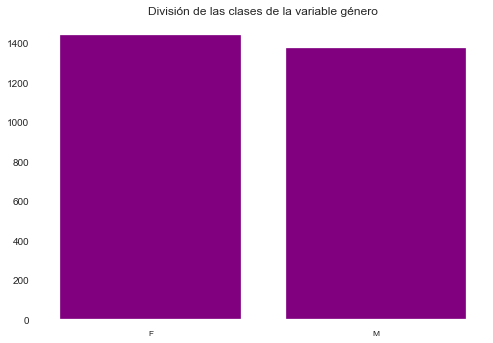

Veamos la cantidad de datos en cada clase: 


GENDER
F    1443
M    1373

In [10]:
val_counts_gender = datos['GENDER'].value_counts()
plt.bar(range(len(val_counts_gender)), val_counts_gender.values, align='center',color='purple')
plt.xticks(range(len(val_counts_gender)), val_counts_gender.index.values, size='small')
plt.title('División de las clases de la variable género')
plt.show()
print('Veamos la cantidad de datos en cada clase: ')
datos['GENDER'].value_counts().to_frame()

## 2. Preparación de datos.

Es el procedimiento llevado a cabo para transformar los valores actuales de
acuerdo con los algoritmos a utilizar y el objetivo de negocio a resolver. Por ejemplo, manejar los datos
nulos (missing values) o los valores atípicos (outliers) .

Primero eliminar el id 


## 3. Modelamiento.

## 4. Validación.

## 5. Visualización.
Haremos la exportación de los datos para usar la herramienta PowerBi